## **GROUP ASSIGNMENT 1**

In [111]:
#imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [148]:
# read the data file
df = pd.read_csv('data.csv')

# Be able to see all the columns
pd.set_option('display.max_columns', None)

# see the first 20 columns
df.head(20)

/var/folders/bt/vkg37vm51db7424mjftzw2700000gn/T/ipykernel_68669/2113178754.py:2: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,zid,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,01-12-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,01-01-1985,1,NaN,NaN,3,0,13648,83.70,9,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,01-01-2015,171.62,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,01-12-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,01-04-1999,5,NaN,NaN,3,0,1687,9.40,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,01-04-2013,119.66,NaN,01-09-2013,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,01-12-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0,01-11-2001,2,NaN,NaN,2,0,2956,98.50,10,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,01-06-2014,649.91,NaN,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,01-02-1996,1,35.0,NaN,10,0,5598,21.00,37,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.0000,01-01-2015,357.48,NaN,01-01-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,01-12-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,01-01-1996,0,38.0,NaN,15,0,27783,53.90,38,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,01-01-2016,67.79,01-02-2016,01-01-2016,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,01-12-2011,n,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,01-11-2004,3,NaN,NaN,9,0,7963,28.30,12,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,01-01-2015,161.03,NaN,01-09-2015,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,01-12-2011,n,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,0,01-07-2005,1,NaN,NaN,7,0,17726,85.60,11,f,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,01-01-2016,170.08,01-02-2016,01-01-2016,0.0,NaN,

### Look for all the NaN values

In [113]:
null_count_ser = pd.isnull(df).sum()
print(null_count_ser)

zid                      0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64


In [147]:
# Show all columns that have missing values
df.isnull().sum()

zid                                0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
addr_state                     13348
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
i

### Drop all columns with more than 50% null values

In [115]:
## Drop the columns with more than 50% missing values
# See initial shape of the dataframe
print(df.shape)

# Get the columns with more than 50% missing values
columns_to_drop = null_count_ser[null_count_ser > 0.5 * df.shape[0]].index

# Drop the columns
df.drop(columns_to_drop, axis=1, inplace=True)

# Check the shape of the dataframe
print(df.shape)

(855969, 73)
(855969, 52)


## CHANGES TO MAKE FOR OUR COLUMNS

### Drop other columns that are redundant
- emp_title
- title(?) ask tutor
- zip_code(?) ask tutor

In [116]:
# Drop redundant columns:
# See initial shape of the dataframe
print(df.shape)

# drop emp_title, title, zip_code
df.drop(['emp_title', 'title', 'zip_code'], axis=1, inplace=True)

# Check the shape of the dataframe
print(df.shape)


(855969, 52)
(855969, 49)


## Columns to encode/change/normalise(?)
- dti: divide by 100, to make it 0.0 to 1.0, then perhaps group into bins (depends on stdev)
- earliest_cr_line: str to date

### Having a look at columns and their values:

In [117]:
# see all the values of 'title'
# df['title'].value_counts()

In [118]:
# see all the values of 'emp_length'
df['emp_length'].value_counts()

emp_length
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: count, dtype: int64

In [119]:
# see all the values of 'grade'
df['grade'].value_counts()

grade
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: count, dtype: int64

In [120]:
# see all the values of 'sub_grade'
df['sub_grade'].value_counts()

sub_grade
B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: count, dtype: int64

In [121]:
# see all the values of 'home_ownership'
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: count, dtype: int64

In [122]:
# see all the values of 'verification_status'
df['verification_status'].value_counts()

verification_status
Source Verified    318178
Verified           280049
Not Verified       257742
Name: count, dtype: int64

In [123]:
# see all the values of 'pymnt_plan'
df['pymnt_plan'].value_counts()

pymnt_plan
n    855964
y         5
Name: count, dtype: int64

In [124]:
# see all the values of 'purpose'
df['purpose'].value_counts()

purpose
debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: count, dtype: int64

In [125]:
# see all the values of 'addr_state'
df['addr_state'].value_counts()

addr_state
CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: count, dtype: int64

### NORMALIZING/ENCODING THE DATA
- term: change months to int
- grade: A to 1, B to 2, etc.
- subgrade: A1 to 1.1, B2, to 2.2, C5 to 3.5, etc.
- emp_length: 0 - 10 (mapping shown below)
- home_ownership: 0 - 5 (mapping shown below)
- verification status: 0 - 2 (mappint shown below)
- pymnt_plan: 0, 1 (n, y)
- addr_state: 0-50
- initial_list_status: 

dates:
- issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

In [126]:
# Change the values of 'term' into integers
df['term'] = df['term'].str.replace('months', '').astype(int)

In [127]:
# Change the values of emp_length into integers
# Create a mapping dictionary for encoding
emp_length_mapping = {
    '10+ years': 10,
    '9 years': 9,
    '8 years': 8,
    '7 years': 7,
    '6 years': 6,
    '5 years': 5,
    '4 years': 4,
    '3 years': 3,
    '2 years': 2,
    '1 year': 1,
    '< 1 year': 0,  # For "< 1 year", assigning 0 to represent less than 1 year of employment
}

# Perform encoding using the mapping dictionary
df['emp_length'] = df['emp_length'].map(emp_length_mapping)


In [128]:
# Change the values of 'grade' into integers
# Create a mapping dictionary for ordinal encoding
grade_mapping = {
    'G': 7,
    'F': 6,
    'E': 5,
    'D': 4,
    'C': 3,
    'B': 2,
    'A': 1,
}

# Perform encoding using the mapping dictionary
df['grade'] = df['grade'].map(grade_mapping)

In [129]:
# Change the values of 'sub_grade' into floating-point numbers
# Create a mapping dictionary for encoding subgrades to floating-point values
sub_grade_mapping = {
    'A1': 1.1,
    'A2': 1.2,
    'A3': 1.3,
    'A4': 1.4,
    'A5': 1.5,
    'B1': 2.1,
    'B2': 2.2,
    'B3': 2.3,
    'B4': 2.4,
    'B5': 2.5,
    'C1': 3.1,
    'C2': 3.2,
    'C3': 3.3,
    'C4': 3.4,
    'C5': 3.5,
    'D1': 4.1,
    'D2': 4.2,
    'D3': 4.3,
    'D4': 4.4,
    'D5': 4.5,
    'E1': 5.1,
    'E2': 5.2,
    'E3': 5.3,
    'E4': 5.4,
    'E5': 5.5,
    'F1': 6.1,
    'F2': 6.2,
    'F3': 6.3,
    'F4': 6.4,
    'F5': 6.5,
    'G1': 7.1,
    'G2': 7.2,
    'G3': 7.3,
    'G4': 7.4,
    'G5': 7.5,
}

# Perform encoding using the mapping dictionary
df['sub_grade'] = df['sub_grade'].map(sub_grade_mapping)


In [130]:
# Change the values of 'home_ownership' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
home_ownership_mapping = {
    'NONE': 0,
    'ANY': 1,
    'OTHER': 2,
    'OWN': 3,
    'RENT': 4,
    'MORTGAGE': 5,
}

# Perform encoding using the mapping dictionary
df['home_ownership'] = df['home_ownership'].map(home_ownership_mapping)


In [131]:
# Change the values of 'verification_status' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
verification_status_mapping = {
    'Not Verified': 0,
    'Source Verified': 1,
    'Verified': 2,
}

# Perform encoding using the mapping dictionary
df['verification_status'] = df['verification_status'].map(verification_status_mapping)

In [132]:
# Change the values of 'pymnt_plan' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
pymnt_plan_mapping = {
    'n': 0,
    'y': 1,
}

# Perform encoding using the mapping dictionary
df['pymnt_plan'] = df['pymnt_plan'].map(pymnt_plan_mapping)

In [133]:
# Change the values of 'purpose' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
purpose_mapping = {
    'educational': 0,
    'small_business': 1,
    'renewable_energy': 2,
    'wedding': 3,
    'moving': 4,
    'house': 5,
    'vacation': 6,
    'medical': 7,
    'car': 8,
    'major_purchase': 9,
    'credit_card': 10,
    'home_improvement': 11,
    'debt_consolidation': 12,
    'other': 13,
}

# Perform encoding using the mapping dictionary
df['purpose'] = df['purpose'].map(purpose_mapping)

In [134]:
# Change the values of 'addr_state' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
addr_state_mapping = {
    'IA': 0,
    'NE': 1,
    'ID': 2,
    'ME': 3,
    'ND': 4,
    'SD': 5,
    'WV': 6,
    'VT': 7,
    'WY': 8,
    'MT': 9,
    'AR': 10,
    'RI': 11,
    'MS': 12,
    'KS': 13,
    'NM': 14,
    'DE': 15,
    'NH': 16,
    'AK': 17,
    'HI': 18,
    'DC': 19,
    'WY': 20,
    'UT': 21,
    'NV': 22,
    'OR': 23,
    'CO': 24,
    'TN': 25,
    'CT': 26,
    'KY': 27,
    'AL': 28,
    'OK': 29,
    'LA': 30,
    'WI': 31,
    'SC': 32,
    'MD': 33,
    'AZ': 34,
    'MO': 35,
    'MN': 36,
    'MA': 37,
    'NJ': 38,
    'MI': 39,
    'VA': 40,
    'WA': 41,
    'NC': 42,
    'GA': 43,
    'IL': 44,
    'PA': 45,
    'OH': 46,
    'NY': 47,
    'TX': 48,
    'FL': 49,
    'CA': 50,
}

# Perform encoding using the mapping dictionary
df['addr_state'] = df['addr_state'].map(addr_state_mapping)

In [135]:
# Change the values of 'initial_list_status' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
initial_list_status_mapping = {
    'f': 0,
    'w': 1,
}

# Perform encoding using the mapping dictionary
df['initial_list_status'] = df['initial_list_status'].map(initial_list_status_mapping)

In [136]:
# Change the values of 'application_type' into integers
# Create a mapping dictionary for ordinal encoding (arbitrary order)
application_type_mapping = {
    'Individual': 0,
    'Joint App': 1,
}

# Perform encoding using the mapping dictionary
df['application_type'] = df['application_type'].map(application_type_mapping)

#### Now change all the dates (currently str) to date type

**NOTE:** not sure whether want to extract the year only from the date and use that for correlation

In [137]:
# issue_d, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d

# Chnage the type of 'issue_d' to datetime
df['issue_d'] = pd.to_datetime(df['issue_d'])
# Extract the year from 'issue_d'
# df['issue_d'] = df['issue_d'].dt.year

# Change the type of 'earliest_cr_line' to datetime
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
# Extract the year from 'earliest_cr_line'
# df['earliest_cr_line'] = df['earliest_cr_line'].dt.year

# Change the type of 'last_pymnt_d' to datetime
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])
# Extract the year from 'last_pymnt_d'
# df['last_pymnt_d'] = df['last_pymnt_d'].dt.year

# Change the type of 'next_pymnt_d' to datetime
df['next_pymnt_d'] = pd.to_datetime(df['next_pymnt_d'])
# Extract the year from 'next_pymnt_d'
# df['next_pymnt_d'] = df['next_pymnt_d'].dt.year

# Change the type of 'last_credit_pull_d' to datetime
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'])
# Extract the year from 'last_credit_pull_d'
# df['last_credit_pull_d'] = df['last_credit_pull_d'].dt.year


In [138]:
# check stuff
df.head(20)

,zid,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,2,2.2,10.0,4,24000.00,2,2011-01-12,0,10,34.0,27.65,0,1985-01-01,1,3,0,13648,83.70,9,0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,2015-01-01,171.62,NaT,2016-01-01,0.0,1,NaN,0,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,3,3.4,0.0,4,30000.00,1,2011-01-12,0,8,43.0,1.00,0,1999-01-04,5,3,0,1687,9.40,4,0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.1100,2013-01-04,119.66,NaT,2013-01-09,0.0,1,NaN,0,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,3,3.5,10.0,4,12252.00,0,2011-01-12,0,1,44.0,8.72,0,2001-01-11,2,2,0,2956,98.50,10,0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,2014-01-06,649.91,NaT,2016-01-01,0.0,1,NaN,0,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,3,3.1,10.0,4,49200.00,1,2011-01-12,0,13,50.0,20.00,0,1996-01-02,1,10,0,5598,21.00,37,0,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.0000,2015-01-01,357.48,NaT,2015-01-01,0.0,1,NaN,0,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,2,2.5,1.0,4,80000.00,1,2011-01-12,0,13,23.0,17.94,0,1996-01-01,0,15,0,27783,53.90,38,0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.0000,2016-01-01,67.79,2016-01-02,2016-01-01,0.0,1,NaN,0,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,1,1.4,3.0,4,36000.00,1,2011-01-12,0,3,34.0,11.20,0,2004-01-11,3,9,0,7963,28.30,12,0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,2015-01-01,161.03,NaT,2015-01-09,0.0,1,NaN,0,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60,15.96,170.08,3,3.5,8.0,4,47004.00,0,2011-01-12,0,12,42.0,23.51,0,2005-01-07,1,7,0,17726,85.60,11,0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.0000,2016-01-01,170.08,2016-01-02,2016-01-01,0.0,1,NaN,0,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36,18.64,109.43,5,5.1,9.0,4,48000.00,1,2011-01-12,0,8,50.0,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,2015-01-01,111.34,NaT,2014-01-12,0.0,1,NaN,0,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,6,6.2,4.0,3,40000.00,1,2011-01-12,0,1,50.0,5.55,0,2004-01-04,2,11,0,5210,32.60,13,0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.0900,2012-01-04,152.39,NaT,2012-01-08,0.0,1,NaN,0,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,2,2.5,0.0,4,15000.00,2,2011-01-12,0,13,48.0,18.08,0,2004-01-09,0,2,0,9279,36.50,3,0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.5200,2012-01-11,121.45,NaT,2013-01-03,0.0,1,NaN,0,NaN,NaN,NaN,1


## NOW ALL ENCODING AND PRERPROCESSING IS DONE, LESKGO CORRELATION MAP WOOO

In [139]:
# Check the data types of the columns
# df.dtypes

# do .corr() to see the correlation between the columns
df.corr()['default_ind'].sort_values()

next_pymnt_d                 -0.356126
out_prncp                    -0.225960
out_prncp_inv                -0.225959
member_id                    -0.220181
zid                          -0.219832
issue_d                      -0.206522
initial_list_status          -0.098812
total_rec_prncp              -0.090336
last_pymnt_amnt              -0.087217
last_credit_pull_d           -0.062186
total_pymnt_inv              -0.040232
total_pymnt                  -0.039220
annual_inc                   -0.037066
tot_cur_bal                  -0.036335
total_rev_hi_lim             -0.033620
open_acc                     -0.021698
total_acc                    -0.021087
purpose                      -0.020992
revol_bal                    -0.020696
home_ownership               -0.019778
pub_rec                      -0.019607
emp_length                   -0.014133
last_pymnt_d                 -0.011652
collections_12_mths_ex_med   -0.010650
delinq_2yrs                  -0.009186
funded_amnt_inv          

### Correlation visualised:

<Axes: >

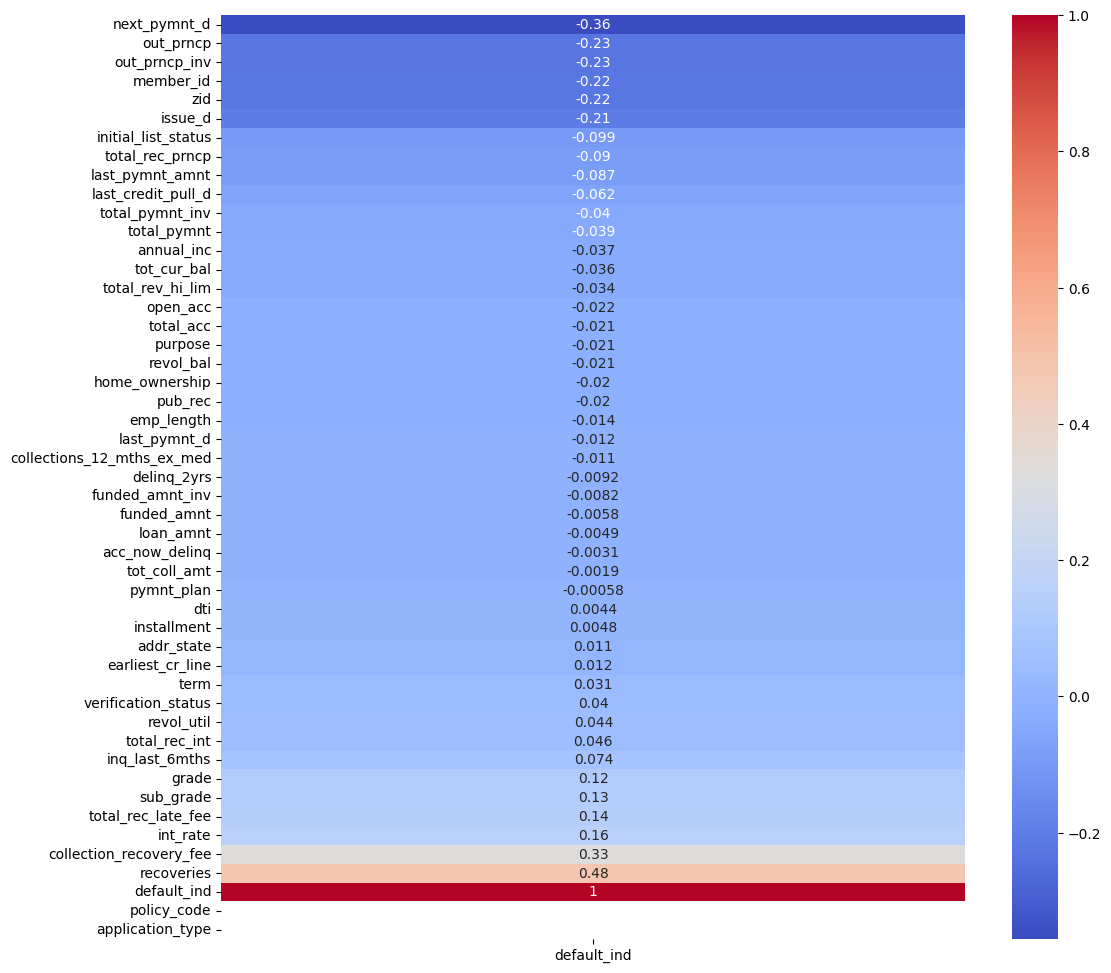

In [146]:
# show heatmap of correlation with default_ind
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr()[['default_ind']].sort_values('default_ind'), annot=True, cmap='coolwarm')
